## Calculation of the precession of Mercury's perihelion

This Jupyter Notebook contains the calculations leading to the value of the precession of Mercury's perihelion caused by the perturbations of the dominant planets of the solar system on the Keplerian orbit. It supplements the work 'Determining the Precession of the Perihelion of Mercury' where all of the steps taken here are expanded upon. 


Planet numbering (expected perihelion precession on Mercury):

1. Mercury
2. Venus (expected 277".8)
3. Earth (exp 90".0)
4. Mars (exp 2".5)
5. Jupiter (exp 153".6)
6. Saturn (exp 7".3)

total expected precession: 531".2 asec/cent

all planetary data from Nasa Planetary fact sheet
https://nssdc.gsfc.nasa.gov/planetary/factsheet/

Mercury's perihelion precession values from Clifford M. Will, Theory and Experiment in Gravitational Physics

In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import sympy as sym
from sympy import solve

In [2]:
# Defining useful quantities

M = 1.99 * (10**30)         # Sun mass (kg)
G = 6.67 * (10**(-11))      # G constant (m^3 / kg s^2)
Rsun = 0.7 * (10**9)        # Sun radius (m)
K = G*M

# masses
m1 = 0.33 * (10**24)        # Mercury mass (kg)
m2 = 4.87 * (10**24)        # Venus mass (kg)
m3 = 5.97 * (10**24)        # Earth mass (kg)
m4 = 0.64 * (10**24)        # Mars mass (kg)
m5 = 1.9 * (10**27)         # Jupiter mass (kg)
m6 = 568 * (10**24)         # Saturn mass (kg)
m = np.array([m1,m2,m3,m4,m5,m6])

# semimajor axes
a1 = 57.9 * (10**9)         # Mercury semimajor axis (m)
a2 = 108 * (10**9)          # Venus semimajor axis (m)
a3 = 149.6 * (10**9)        # Earth semimajor axis (m)
a4 = 228 * (10**9)          # Mars semimajor axis (m)
a5 = 778.5 * (10**9)        # Jupiter semimajor axis (m)
a6 = 1432 * (10**9)         # Saturn semimajor axis (m)
a = np.array([a1,a2,a3,a4,a5,a6])

# orbital inclinations
i1 = 7                      # Mercury inclination (deg)
i2 = 3.4                    # Venus inclination (deg)
i3 = 0                      # Earth inclination (deg)
i4 = 1.9                    # Mars inclination (deg)
i5 = 1.3                    # Jupiter inclination (deg)
i6 = 2.5                    # Saturn inclination (deg)
i = np.array([i1,i2,i3,i4,i5,i6])

# orbital eccentricities
e1 = 0.21                   # Mercury eccentricity
e2 = 0.007                  # Venus eccentricity
e3 = 0.017                  # Earth eccentricity
e4 = 0.093                  # Mars eccentricity
e5 = 0.05                   # Jupiter eccentricity
e6 = 0.05                   # Saturn eccentricity
e = np.array([e1,e2,e3,e4,e5,e6])

# argument of the perihelion (omega bar)
w1 = 77.5*np.pi/180         # Mercury perihelion (rad)
w2 = 131.5*np.pi/180        # Venus perihelion (rad)
w3 = 103*np.pi/180          # Earth perihelion (rad)
w4 = 336*np.pi/180          # Mars perihelion (rad)
w5 = 14.8*np.pi/180         # Jupiter perihelion (rad)
w6 = 92.4*np.pi/180         # Saturn perihelion (rad)
w = np.array([w1,w2,w3,w4,w5,w6])

# longitude of the ascending node
Q1 = 48.3*np.pi/180         # Mercury ascending node (rad)
Q2 = 76.7*np.pi/180         # Venus ascending node (rad)
Q3 = -11.3*np.pi/180        # Earth ascending node (rad)
Q4 = 49.58*np.pi/180        # Mars ascending node (rad)
Q5 = 100.6*np.pi/180        # Jupiter ascending node (rad)
Q6 = 113.7*np.pi/180        # Saturn ascending node (rad)
Q = np.array([Q1,Q2,Q3,Q4,Q5,Q6])

# semimajor axes ratios
A1 = 0
A2 = a1/a2
A3 = a1/a3
A4 = a1/a4
A5 = a1/a5
A6 = a1/a6
A = np.array([A1,A2,A3,A4,A5,A6])

# Newtonian constant
k1 = 0
k2 = G*m2
k3 = G*m3
k4 = G*m4
k5 = G*m5
k6 = G*m6
k = np.array([k1,k2,k3,k4,k5,k6])

# mean angular velocities
n = np.sqrt(K/(a**3))

# conversions
ASEC = 206264.806           # rad to arcsec
CENT = 3.169 * (10**(-10))  # second to century

# expected precession of Mercury's perihelion
precession = [ 277.8 ,  90.0  ,  2.5   ,   153.6   ,   7.3    ]
planet =     ['Venus', 'Earth', 'Mars' , 'Jupiter' , 'Saturn' ]

In [3]:
# definition of Laplace coefficients
# Murray & Dermott, Solar system dynamics, p. 237, Eq. 6.68

def b0(s,a): 
    
    return 2*(1 + (s*a)**2 + 0.25*(s*(s+1))**2 * (a**4))

def b1(s,a): 
    
    return 2*s*a*(1 + 0.5*s*(s+1)*(a**2) + (1/12)*s*((s+1)**2)*(s+2) * (a**4))

def b2(s,a): 
    
    return s*(s+1)*(a**2)*(1 + (1/3)*s*(s+2)*(a**2) + (1/24)*s*(s+1)*(s+2)*(s+3) * (a**4))

Jupiter 

(array([2.40666990e-13, 8.58602877e-19]), array([[ 1.00000000e+00,  9.25048438e-02],
       [-3.34326738e-07,  9.95712234e-01]])) 


a =  0.09250484380880696 ,  b =  -3.3432673827404044e-07 ,  c =  0.9957122344693312 ,  d =  0.9999999999999444 
h1 =  0.205022161495186 ,  h2 =  0.012772287896789525 
k1 =  0.045452318927001606 ,  k2 =  0.04834116943022297 


[0.21000000117736387, 0.04476093388529592, 1.352630099255648, -0.13940991061441924]
77.5
 slope: p0 = 156.646040 +/- 0.000000 , constant: p1 = 77.500000 +/- 0.000000

 result:  156.646040,   expected:  153.6

-------------------------------------------------------------------



156.64604043500097

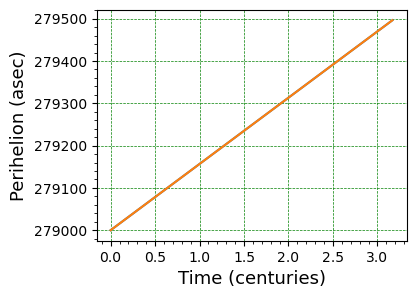

In [59]:
# calculating the perihelion precession by solving the secular theory for two planets to the 2nd order in the eccentricities, 
# as presented in Murray & Dermott, chapter 7

def perihelion(num):
    
    # the disturbing functions (perturbing Hamiltonians, essentially) for both planets can be written in terms of the matrix 
    # Amatr defined below, containing just the terms that affect the perihelion precession
    
    planetnum = num-1
    
    print(planet[planetnum-1],'\n')
    
    Amatr = np.empty([2,2])
    mnew = [m[0],m[planetnum]]
    nnew = [n[0],n[planetnum]]
    
    for p in range(2):
        
        for q in range(2):
            
            if (p==q):
                
                j = 1-p
                Amatr[p,q] =  (nnew[p]/4)*(mnew[j]/M)*((A[planetnum])**2)*b1(3/2,A[planetnum])
                
            if (p!=q):

                Amatr[p,q] = -(nnew[p]/4)*(mnew[q]/M)*((A[planetnum])**2)*b2(3/2,A[planetnum])
    
    # correcting mean angular velocities
    Amatr[0,0] *= np.sqrt(1 - e[0]**2)
    Amatr[0,1] *= np.sqrt(1 - e[0]**2)
    Amatr[1,0] *= np.sqrt(1 - e[planetnum]**2)
    Amatr[1,1] *= np.sqrt(1 - e[planetnum]**2)
    
    # the eigenvalues and eigenvectors of Amatr:
    
    eg = np.linalg.eig(Amatr)
    print(eg, "\n\n")
    
    # here we transform from the coordinates w and e to h = e sin(w), k = e cos(w). The equations of motion yield a
    # differential equation of the form k" + Amatr k = 0 (k and h here being the vectors [k1 k2] and [h1 h2] for Mercury and 
    # the perturbing planet respectively), and therefore each k is periodic with their frequencies being the eigenvalues
    # of Amatr and the amplitudes depending on the eigenvectors and the initial conditions
    
    # initial values of h and k:
    
    h1 = e[0]*np.sin(w[0])
    h2 = e[planetnum]*np.sin(w[planetnum])
    k1 = e[0]*np.cos(w[0])
    k2 = e[planetnum]*np.cos(w[planetnum])
    
    # eigenvector components: v1 = [coeff4, coeff1], v2 = [coeff2, coeff3]
    # coeff4 was added afterwards because it is approximately 1
    
    coeff4 = eg[1][0][0]
    coeff1 = eg[1][0][1]
    coeff2 = eg[1][1][0]
    coeff3 = eg[1][1][1]
    
    print(   "a = ",  coeff1,
          ",  b = ",  coeff2,
          ",  c = ",  coeff3,
          ",  d = ",  coeff4,
          "\nh1 = ",  h1,
          ",  h2 = ", h2,
          "\nk1 = ",  k1,
          ",  k2 = ", k2,
          "\n\n")
    
    # solving for the eigenvector amplitudes r1, r2 and initial phases r3, r4 from the initial conditions
    
    l = 1/(coeff3*coeff4 - coeff1*coeff2)
    
    x = l*( coeff3*h1 - coeff2*h2 )
    y = l*(-coeff1*h1 + coeff4*h2 )
    z = l*( coeff3*k1 - coeff2*k2 )
    r = l*(-coeff1*k1 + coeff4*k2 )
    
    r1 = np.sqrt(x**2 + z**2)
    r2 = np.sqrt(y**2 + r**2)
    r3 = np.arctan(x/z)
    r4 = np.arctan(y/r)
    
    root = [r1,r2,r3,r4]
    print(root)
    
    # Mercury's perihelion as a function of time
    
    def h1func(t):
        return root[0]*coeff4*np.sin(eg[0][0]*t + root[2]) + root[1]*coeff2*np.sin(eg[0][1]*t + root[3])
    def k1func(t):
        return root[0]*coeff4*np.cos(eg[0][0]*t + root[2]) + root[1]*coeff2*np.cos(eg[0][1]*t + root[3])    
    def wfunc(t):
        return np.arctan(h1func(t)/k1func(t))
    
    print(wfunc(0)*180/np.pi)
    
    # convert to arcsec/century and linear fit
    
    T1 = 10**10
    t1 = np.linspace(0, T1, num = 10000)
    w1 = wfunc(t1)
    W1 = ASEC*np.array(w1)
    
    def Wfit(t,a,b): return a*t+b
    
    popt, pcov = curve_fit(Wfit, CENT*t1, W1) 
    # this line fits the data (x,y,dy) (dy is the error) with the function ff
    # the above line returns the best paramemeters (inside of popt) and the covariance matrix (the errors of the parameters)
    dpopt=np.sqrt(np.diag(pcov)) 
    # from the covariance matrix we get the error on parameters
    print(f" slope: p0 = {popt[0]:.6f} +/- {dpopt[0]:.6f} , constant: p1 = {popt[1]*180/(np.pi*ASEC):.6f} +/- {dpopt[1]*180/(np.pi*ASEC):.6f}")  
    p0=popt[0]
    p1=popt[1]

    plt.plot(CENT*t1,W1)
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

    q = np.linspace(0, CENT*T1, num = 1000)
    line = [ p0*x + p1 for x in q ]
    plt.plot(q,line, label = planet[planetnum-1])
    plt.ylabel("Perihelion (asec)", fontsize=13)
    plt.xlabel("Time (centuries)", fontsize=13)
    plt.minorticks_on()
    plt.rcParams["figure.figsize"] = (4,3)
    
    #plt.plot(t1*CENT, ASEC*wfunc(t1))
    
    print("\n",f"result:  {p0:.6f},   expected:  {precession[planetnum-1]}")
    
    print("\n-------------------------------------------------------------------\n")
    
    return p0
    
perihelion(5)

Venus 

(array([4.08206865e-13, 6.29636449e-15]), array([[ 0.99983972,  0.54978809],
       [-0.01790323,  0.83530417]])) 


a =  0.5497880947451927 ,  b =  -0.017903229992944657 ,  c =  0.8353041666820842 ,  d =  0.9998397243337653 
h1 =  0.205022161495186 ,  h2 =  0.0052426900455230145 
k1 =  0.045452318927001606 ,  k2 =  -0.004638340337510163 


[0.20767433271030888, 0.13193348275256053, 1.353207921349772, 1.3018195609875627]
77.56696616662084
 slope: p0 = 268.700500 +/- 0.000001 , constant: p1 = 77.566966 +/- 0.000000

 result:  268.700500,   expected:  277.8

-------------------------------------------------------------------

Earth 

(array([1.41993713e-13, 1.48769046e-15]), array([[ 0.99997867,  0.43263798],
       [-0.00653143,  0.90156773]])) 


a =  0.4326379800966061 ,  b =  -0.006531427148299094 ,  c =  0.9015677335496922 ,  d =  0.9999786700022189 
h1 =  0.205022161495186 ,  h2 =  0.016564291101349 
k1 =  0.045452318927001606 ,  k2 =  -0.003824167923845702 


[0.2094591356

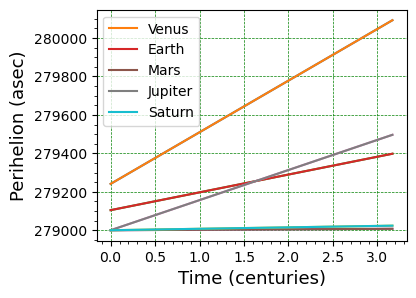

In [60]:
# adding precession for all planets

sum = 0

res = []

for j in [2,3,4,5,6]:
    
    per = perihelion(j)
    sum += per
    res += [per]
    
plt.legend()
    
print(" total:  ", sum, ",    expected:  531.2")

### additional plots

[-9.09950015  2.65998788 -0.15090193  3.04604044  0.16923716]


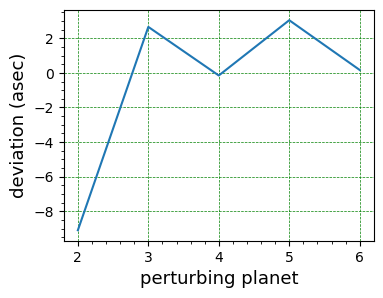

In [61]:
# deviation from expected precession per planet

dev = np.array(res) - np.array(precession)
plt.plot([2,3,4,5,6], dev)

plt.ylabel("deviation (asec)", fontsize=13)
plt.xlabel("perturbing planet", fontsize=13)
plt.minorticks_on()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

print(dev)

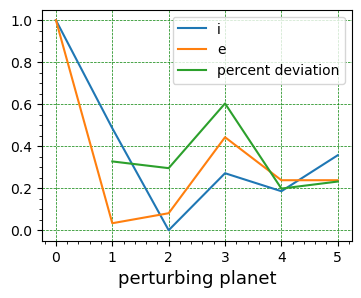

In [66]:
# various orbital elements per planet (normalised with maximum)

plt.plot(range(6),i/max(i), label = 'i')
plt.plot(range(6),e/max(e), label = 'e')
#plt.plot(range(6),a/max(a), label = 'a')
#plt.plot(range(6),w/max(w), label = 'w')
#plt.plot(range(6),Q/max(Q), label = 'Q')

# percent deviation per planet

newlist = dev/precession
plt.plot(np.array(range(5))+1,10*abs(newlist), label = 'percent deviation')

plt.xlabel("perturbing planet", fontsize=13)
plt.minorticks_on()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()